In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
data = pd.read_csv("ghana_weather_jan_to_june.csv")
print(data)

           Date  Rainfall  Temperature  Humidity
0    2024-01-01      23.8         33.4      85.2
1    2024-01-02       7.4         28.1      74.2
2    2024-01-03       0.0         25.7      76.3
3    2024-01-04       0.0         30.8      78.3
4    2024-01-05      25.9         30.6      89.1
..          ...       ...          ...       ...
177  2024-06-26       0.0         30.9      61.0
178  2024-06-27      11.3         27.7      83.3
179  2024-06-28       0.0         31.2      77.2
180  2024-06-29       7.3         31.9      73.9
181  2024-06-30       0.0         31.2      76.8

[182 rows x 4 columns]


In [15]:
data["Date"] = pd.to_datetime(data['Date'])
print(data)

          Date  Rainfall  Temperature  Humidity
0   2024-01-01      23.8         33.4      85.2
1   2024-01-02       7.4         28.1      74.2
2   2024-01-03       0.0         25.7      76.3
3   2024-01-04       0.0         30.8      78.3
4   2024-01-05      25.9         30.6      89.1
..         ...       ...          ...       ...
177 2024-06-26       0.0         30.9      61.0
178 2024-06-27      11.3         27.7      83.3
179 2024-06-28       0.0         31.2      77.2
180 2024-06-29       7.3         31.9      73.9
181 2024-06-30       0.0         31.2      76.8

[182 rows x 4 columns]


In [16]:
print(data.head())

        Date  Rainfall  Temperature  Humidity
0 2024-01-01      23.8         33.4      85.2
1 2024-01-02       7.4         28.1      74.2
2 2024-01-03       0.0         25.7      76.3
3 2024-01-04       0.0         30.8      78.3
4 2024-01-05      25.9         30.6      89.1


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         182 non-null    datetime64[ns]
 1   Rainfall     182 non-null    float64       
 2   Temperature  182 non-null    float64       
 3   Humidity     182 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 5.8 KB


In [19]:
data.describe()

,Date,Rainfall,Temperature,Humidity
count,182,182.000000,182.000000,182.000000
mean,2024-03-31 12:00:00,11.366484,29.840659,74.990659
min,2024-01-01 00:00:00,0.000000,24.100000,60.100000
25%,2024-02-15 06:00:00,0.625000,27.000000,66.725000
50%,2024-03-31 12:00:00,10.400000,29.950000,75.600000
75%,2024-05-15 18:00:00,20.675000,32.775000,82.500000
max,2024-06-30 00:00:00,30.000000,34.900000,89.800000
std,NaN,10.129800,3.289175,8.723884


In [22]:
data.shape
data.columns

Index(['Date', 'Rainfall', 'Temperature', 'Humidity'], dtype='object')

In [23]:
def classify_rain(mm):
    if mm > 10:
        return "Heavy Rainfall"
    elif mm > 0:
        return "Light Rain"
    else:
        return "Dry"

In [25]:
data["WeatherType"] = data["Rainfall"].apply(classify_rain)
print(data)

          Date  Rainfall  Temperature  Humidity     WeatherType
0   2024-01-01      23.8         33.4      85.2  Heavy Rainfall
1   2024-01-02       7.4         28.1      74.2      Light Rain
2   2024-01-03       0.0         25.7      76.3             Dry
3   2024-01-04       0.0         30.8      78.3             Dry
4   2024-01-05      25.9         30.6      89.1  Heavy Rainfall
..         ...       ...          ...       ...             ...
177 2024-06-26       0.0         30.9      61.0             Dry
178 2024-06-27      11.3         27.7      83.3  Heavy Rainfall
179 2024-06-28       0.0         31.2      77.2             Dry
180 2024-06-29       7.3         31.9      73.9      Light Rain
181 2024-06-30       0.0         31.2      76.8             Dry

[182 rows x 5 columns]


In [27]:
# Creating a new column with the name month and extracting the months from the date
data['Month'] = data["Date"].dt.strftime("%B")
print(data)

          Date  Rainfall  Temperature  Humidity     WeatherType    Month
0   2024-01-01      23.8         33.4      85.2  Heavy Rainfall  January
1   2024-01-02       7.4         28.1      74.2      Light Rain  January
2   2024-01-03       0.0         25.7      76.3             Dry  January
3   2024-01-04       0.0         30.8      78.3             Dry  January
4   2024-01-05      25.9         30.6      89.1  Heavy Rainfall  January
..         ...       ...          ...       ...             ...      ...
177 2024-06-26       0.0         30.9      61.0             Dry     June
178 2024-06-27      11.3         27.7      83.3  Heavy Rainfall     June
179 2024-06-28       0.0         31.2      77.2             Dry     June
180 2024-06-29       7.3         31.9      73.9      Light Rain     June
181 2024-06-30       0.0         31.2      76.8             Dry     June

[182 rows x 6 columns]


In [30]:
monthly_rain = data.groupby("Month")["Rainfall"].mean()
print(monthly_rain)
monthly_temperature = data.groupby("Month")["Temperature"].mean()
print(monthly_temperature)

Month
April        9.493333
February     8.948276
January     11.870968
June         8.863333
March       11.038710
May         17.687097
Name: Rainfall, dtype: float64
Month
April       29.476667
February    29.689655
January     29.616129
June        29.766667
March       30.229032
May         30.241935
Name: Temperature, dtype: float64


[]

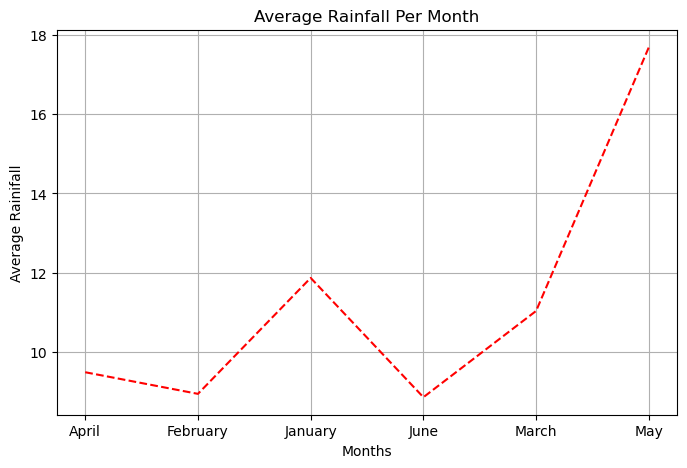

In [40]:
plt.figure(figsize=(8, 5))
plt.plot(monthly_rain.index, monthly_rain.values, linestyle="--", color="red")
plt.title("Average Rainfall Per Month")
plt.xlabel("Months")
plt.ylabel("Average Rainifall")
plt.grid(True)
plt.plot()

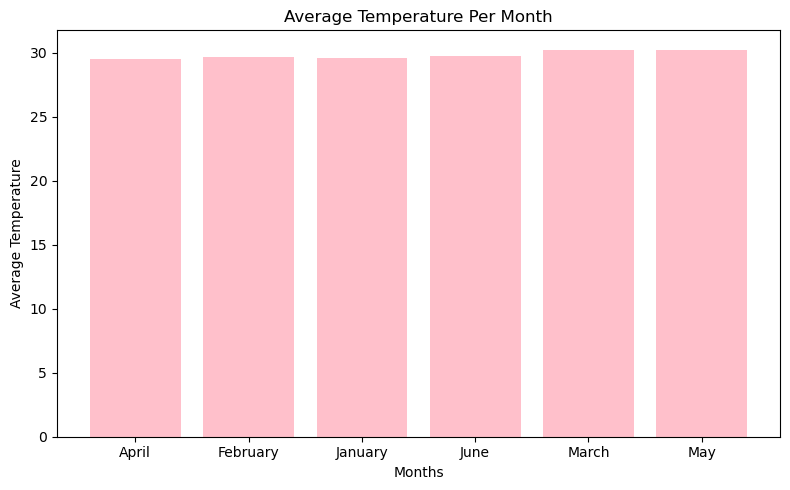

In [43]:
plt.figure(figsize=(8, 5))
plt.bar(monthly_temperature.index, monthly_temperature.values, color="pink")
plt.title("Average Temperature Per Month")
plt.xlabel("Months")
plt.ylabel("Average Temperature")
plt.tight_layout()
plt.show()

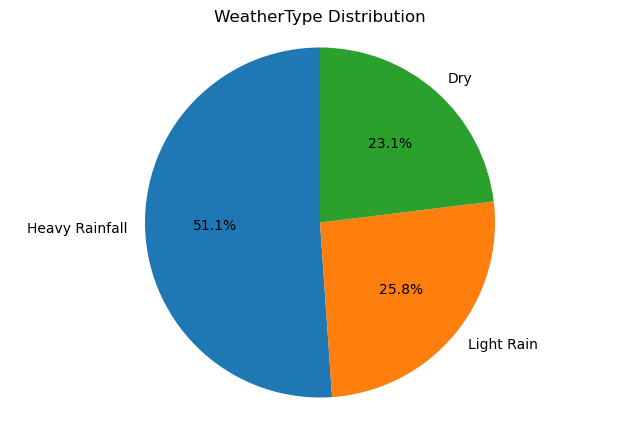

In [49]:
plt.figure(figsize=(8, 5))
plt.pie(data["WeatherType"].value_counts(),
        labels=data["WeatherType"].value_counts().index,
        autopct="%1.1f%%",
        startangle=90,)
plt.title("WeatherType Distribution")
plt.axis("equal")
plt.show()

In [58]:
total_rainfall = data["Rainfall"].sum()
average_temperature = data["Temperature"].mean()
highest_rain = data["Rainfall"].max()

print(total_rainfall)
print(average_temperature)
print(highest_rain)

2068.7
29.84065934065934
30.0


In [59]:
max_index = data["Rainfall"].idxmax()
peak_date = data.loc[max_index, "Date"]
peak_month = data.loc[max_index, "Month"]

print(max_index)
print(peak_date)
print(peak_month)

11
2024-01-12 00:00:00
January


In [60]:
data.to_csv("cleaned_weather_data.csv", index=False)